In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
# load dataset
# creadit card data
df = pd.read_csv(r'/home/rahul/my_project_dir/python_learning/Class/Datasets/crx.csv')
df.sample(5)

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16
677,b,19.42,7.25,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
641,?,33.17,2.25,y,p,cc,v,3.500,f,f,0,t,g,00200,141,-
675,a,41.58,1.04,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
622,a,25.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
257,b,20.00,0.00,u,g,d,v,0.500,f,f,0,f,g,00144,0,-


In [3]:
df.isnull().sum()

a1     0
a2     0
s3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
dtype: int64

In [4]:
print(df.info())
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      690 non-null    object 
 1   a2      690 non-null    object 
 2   s3      690 non-null    float64
 3   a4      690 non-null    object 
 4   a5      690 non-null    object 
 5   a6      690 non-null    object 
 6   a7      690 non-null    object 
 7   a8      690 non-null    float64
 8   a9      690 non-null    object 
 9   a10     690 non-null    object 
 10  a11     690 non-null    int64  
 11  a12     690 non-null    object 
 12  a13     690 non-null    object 
 13  a14     690 non-null    object 
 14  a15     690 non-null    int64  
 15  a16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


               s3          a8        a11            a15
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    10

In [5]:
# taking categorical data at one variable 
columns = [cols for cols in df.columns]
categorical_cols = [cols for cols in columns if df[cols].dtypes == 'O' ]
categorical_cols

['a1', 'a2', 'a4', 'a5', 'a6', 'a7', 'a9', 'a10', 'a12', 'a13', 'a14', 'a16']

In [6]:
# now let's check the unique values in each data point
for cols in categorical_cols:
    print(cols , df[cols].unique())

a1 ['b' 'a' '?']
a2 ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '5

Counter({'b': 468, 'a': 210, '?': 12})


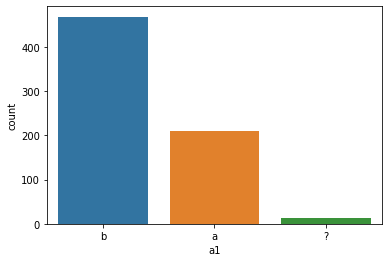

In [7]:
print(Counter(df['a1']))
sns.countplot(df['a1'])

In [8]:
# df.loc[df.a1 =='?' , 'a1'] = 'b'

In [9]:
print(Counter(df['a1']))

Counter({'b': 468, 'a': 210, '?': 12})


In [10]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtypes != np.int64 and df[column].dtypes != np.float64:
            column_content = df[column].values.tolist()
            unique_elements = set(column_content)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x +=1
            df[column] = list(map(convert_to_int, df[column]))
    return df

df = handle_non_numerical_data(df)

In [11]:
for cols in categorical_cols:
    print(cols ,':',df[cols].unique())

a1 : [1 0 2]
a2 : [ 83 318 161 333 268 169 319 232 147 258 172 203 320   0 290 306 193 212
 194  77 167  33  27 156 198 197  29  70 295 316 343 294 266  23   8 249
  85 202 347 148  72 275 345  69 242 251 115 124 132  35 211 215  99 121
 214 273 305  47 264 259 207 137 181 256   3  73 262 308 344 191  90 176
 139  61 260  39 240 108 246   5 221  94 173 219 281 349 145 321  97 188
  11  31 233  42 317 116 322 100 205 119  19 190 196 220 111 110   2 271
 183  60 336 122 112 245 146  74 272 287 298 227   9  12 104  25 101 329
 288  50  57 224 231  78 234 302 213 131 297  37  98 223 153 300 106   4
 239 299 311  67  59 154 222 291   6 244 332 136  88 339  51  87 235 165
  32 280 120 138  66 118 199 269 150 282 140  26 248  20 206  62 201 157
 179 270  45 177 301  43 277  52 328 210 168   1 133 107 252  65  22 247
 346  89  76  36 160 149 114 152  48 286 186 125  95  86 237  18 134  53
 331  30 337 204 276 109  13  14 174 209 296 123 184 330  41 255 334 285
 164 175  71 216 267 238 129  46 

In [13]:
for cols in categorical_cols:
    print(cols ,':',Counter(df[cols]))

a1 : Counter({1: 468, 0: 210, 2: 12})
a2 : Counter({246: 12, 239: 9, 137: 7, 161: 6, 77: 6, 167: 6, 176: 6, 97: 6, 298: 6, 218: 6, 333: 5, 319: 5, 212: 5, 249: 5, 240: 5, 78: 5, 232: 4, 172: 4, 156: 4, 8: 4, 347: 4, 305: 4, 181: 4, 262: 4, 221: 4, 321: 4, 100: 4, 220: 4, 110: 4, 271: 4, 201: 4, 270: 4, 252: 4, 186: 4, 268: 3, 306: 3, 193: 3, 194: 3, 266: 3, 23: 3, 124: 3, 132: 3, 214: 3, 207: 3, 73: 3, 308: 3, 139: 3, 260: 3, 94: 3, 145: 3, 11: 3, 317: 3, 111: 3, 60: 3, 287: 3, 9: 3, 231: 3, 244: 3, 332: 3, 87: 3, 235: 3, 165: 3, 206: 3, 62: 3, 301: 3, 107: 3, 247: 3, 149: 3, 152: 3, 53: 3, 331: 3, 13: 3, 14: 3, 209: 3, 334: 3, 285: 3, 216: 3, 151: 3, 144: 3, 225: 3, 113: 3, 185: 3, 327: 3, 274: 3, 189: 3, 289: 3, 142: 3, 171: 3, 313: 3, 103: 3, 169: 2, 320: 2, 0: 2, 27: 2, 198: 2, 316: 2, 343: 2, 85: 2, 148: 2, 72: 2, 275: 2, 242: 2, 251: 2, 215: 2, 99: 2, 121: 2, 273: 2, 47: 2, 259: 2, 344: 2, 191: 2, 61: 2, 188: 2, 31: 2, 205: 2, 119: 2, 19: 2, 190: 2, 183: 2, 336: 2, 245: 2, 74: 2,

In [14]:
# using elbow method
wcss = []
for i in range(1,20):
    km = KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)
    
wcss

[18711296920.638103,
 5579870143.303266,
 2810049616.2235208,
 1191255684.8298767,
 678743007.0114592,
 312843610.14323413,
 191564941.4451233,
 126567281.0586726,
 84987474.3794133,
 66895546.27632943,
 56570437.79852568,
 47169801.98434869,
 37363958.718796775,
 29794368.526885897,
 25119194.077932257,
 21681107.634899125,
 18677758.261180174,
 16272352.516211998,
 14281992.595612211]

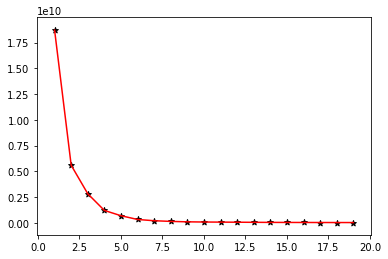

In [45]:
plt.plot(range(1,20), wcss ,'r')
plt.scatter(range(1,20), wcss,marker='*', color='k')
plt.show()

In [46]:
cluster = KMeans(n_clusters=4)
cluster.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
Counter(cluster.predict(df))

Counter({1: 651, 3: 4, 0: 34, 2: 1})

In [48]:
df['cluster'] = cluster.fit_predict(df)

In [49]:
df.head()

,a1,a2,s3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,cluster
0,1,83,0.000,1,1,5,3,1.25,0,0,1,1,1,107,0,0,0
1,0,318,4.460,1,1,9,2,3.04,0,0,6,1,1,7,560,0,0
2,0,161,0.500,1,1,9,2,1.50,0,1,0,1,1,27,824,0,0
3,1,333,1.540,1,1,5,3,3.75,0,0,5,0,1,114,3,0,0
4,1,268,5.625,1,1,5,3,1.71,0,1,0,1,0,28,0,0,0


In [50]:
Counter(df['cluster'])

Counter({0: 651, 1: 4, 3: 34, 2: 1})